# **Assignment : Anime Recommended System**

- 62010278 ณัฐพนธ์ สุขถาวร 
- 62010497 นิธิ น้อมประวัติ 
- 62010609 พักตร์ภูมิ ตาแพร่ 
- 62010948 สิรวิชญ์ สุขวัฒนาวิทย์ 

## **Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## **Global Config**

In [2]:
sns.set_theme(style="whitegrid", palette="pastel")


class CONFIG:
    PLT_FIG_SIZE = plt.figaspect(8/19)


# color codes for python build-in print function
class PRINT_COLOR_CODE:
    BLUE = '\033[94m'
    CYAN = '\033[96m'
    GREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    ENDC = '\033[0m'


## **Define Util Functions**

In [3]:
# function to return list of columns which contained Nan value
def get_cols_contained_na(df):
    masked_na_df = df.isna()
    cols_with_na = df.columns[masked_na_df.any()].tolist()
    return cols_with_na


## **Import Datasets**

In [4]:
ANIME_CSV_PATH = "./datasets/anime.csv"
RATING_CSV_PATH = "./datasets/rating.csv"


In [5]:
anime_df = pd.read_csv(ANIME_CSV_PATH)
anime_df.rename(columns={'rating': 'average_rating'}, inplace=True)

rating_df = pd.read_csv(RATING_CSV_PATH)
rating_df.rename(columns={'rating': 'user_rating'}, inplace=True)

rating_merged_df = rating_df.merge(anime_df, on='anime_id', how='inner')

# NOTE : Careful of big file size
# rating_merged_df.to_csv('./dataExplores/rating_merged_anime.csv', index=False,  encoding='utf-8')


## **Data Exploration (1)**

### 1. **Anime Dataframe** Basic Info.

In [6]:
print(f'\n{PRINT_COLOR_CODE.FAIL}List of columns that contain NaN values : {PRINT_COLOR_CODE.WARNING}{get_cols_contained_na(anime_df)}{PRINT_COLOR_CODE.ENDC}')

anime_df



List of columns that contain NaN values : ['genre', 'type', 'average_rating']


,anime_id,name,genre,type,episodes,average_rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


,anime_id,average_rating,members
count,12294.0,12064.0,12294.0
mean,14058.2,6.5,18071.3
std,11455.3,1.0,54820.7
min,1.0,1.7,5.0
25%,3484.2,5.9,225.0
50%,10260.5,6.6,1550.0
75%,24794.5,7.2,9437.0
max,34527.0,10.0,1013917.0


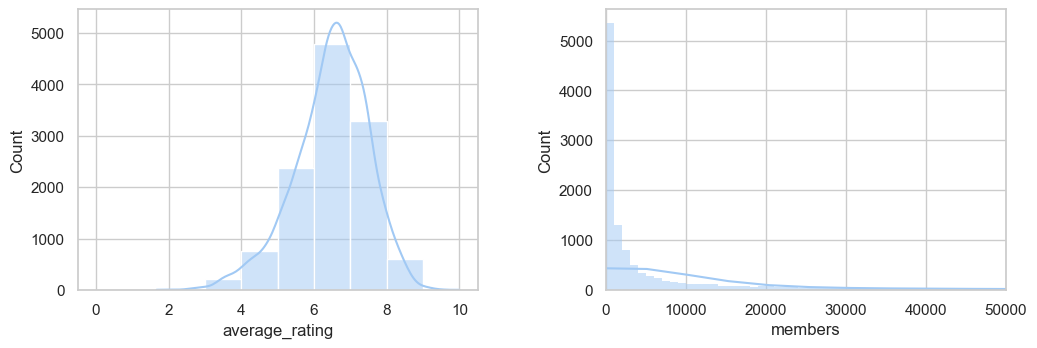

In [7]:
fig, axs = plt.subplots(ncols=2, figsize=CONFIG.PLT_FIG_SIZE)
fig.tight_layout(pad=5.0)

sns.histplot(anime_df, x='average_rating', kde=True, binwidth=1, binrange=[0, 10], ax=axs[0])

sns.histplot(anime_df, x='members', kde=True, binwidth=1e3, ax=axs[1])
axs[1].set(xlim=(0, 0.05e6))

anime_df.describe().apply(lambda s: s.apply('{0:.1f}'.format))


### 2. **Rating Dataframe** Basic info.

In [8]:
print(f'\n{PRINT_COLOR_CODE.FAIL}List of columns that contain NaN values : {PRINT_COLOR_CODE.WARNING}{get_cols_contained_na(rating_df)}{PRINT_COLOR_CODE.ENDC}')

rating_df


List of columns that contain NaN values : []


,user_id,anime_id,user_rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
...,...,...,...
7813732,73515,16512,7
7813733,73515,17187,9
7813734,73515,22145,10
7813735,73516,790,9


,user_id,anime_id,user_rating
count,7813737.0,7813737.0,7813737.0
mean,36728.0,8909.1,6.1
std,20997.9,8883.9,3.7
min,1.0,1.0,-1.0
25%,18974.0,1240.0,6.0
50%,36791.0,6213.0,7.0
75%,54757.0,14093.0,9.0
max,73516.0,34519.0,10.0


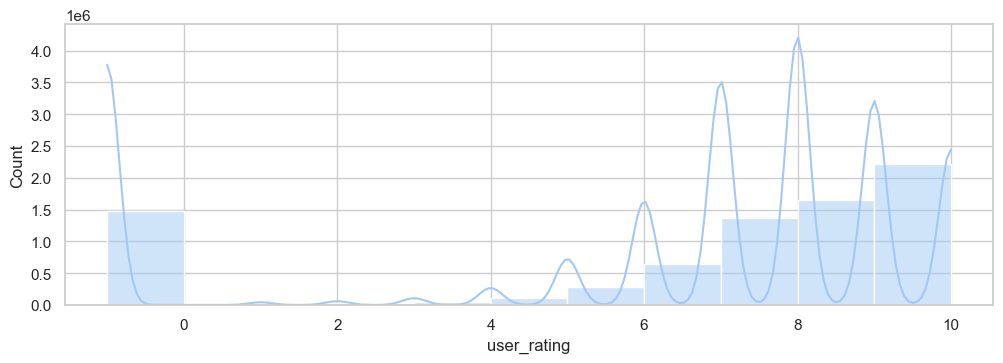

In [9]:
fig, axs = plt.subplots(ncols=1, figsize=CONFIG.PLT_FIG_SIZE)
fig.tight_layout(pad=5.0)

sns.histplot(rating_df, x='user_rating', kde=True, binwidth=1, binrange=[-1, 10], ax=axs)

rating_df.describe().apply(lambda s: s.apply('{0:.1f}'.format))

### 3. **Rating Merged Dataframe** Basic info.

In [10]:
print(f'\n{PRINT_COLOR_CODE.FAIL}List of columns that contain NaN values : {PRINT_COLOR_CODE.WARNING}{get_cols_contained_na(rating_merged_df)}{PRINT_COLOR_CODE.ENDC}')

rating_merged_df.sort_values(by=['user_id', 'anime_id'])



List of columns that contain NaN values : ['genre', 'type', 'average_rating']


,user_id,anime_id,user_rating,name,genre,type,episodes,average_rating,members
0,1,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
25925,1,24,-1,School Rumble,"Comedy, Romance, School, Shounen",TV,26,8.06,178553
33078,1,79,-1,Shuffle!,"Comedy, Drama, Ecchi, Fantasy, Harem, Magic, R...",TV,24,7.31,158772
40190,1,226,-1,Elfen Lied,"Action, Drama, Horror, Psychological, Romance,...",TV,13,7.85,623511
67696,1,241,-1,Girls Bravo: First Season,"Comedy, Ecchi, Fantasy, Harem, Romance, School",TV,11,6.69,84395
...,...,...,...,...,...,...,...,...,...
1474883,73515,16512,7,Devil Survivor 2 The Animation,"Action, Demons, Supernatural",TV,13,7.06,101266
6640957,73515,17187,9,Ghost in the Shell: Arise - Border:1 Ghost Pain,"Mecha, Police, Psychological, Sci-Fi",Movie,1,7.64,31747
4153140,73515,22145,10,Kuroshitsuji: Book of Circus,"Comedy, Demons, Fantasy, Historical, Shounen, ...",TV,10,8.37,122895
4055601,73516,790,9,Ergo Proxy,"Mystery, Psychological, Sci-Fi",TV,23,8.03,265005


In [11]:
rating_merged_df.groupby(by='type').count().sort_values(by='user_id', ascending=False).rename(columns={'user_id': 'count'})[['count']]


,count
type,
TV,5283596
Movie,1051998
OVA,800307
Special,559366
ONA,91956
Music,26500


quatile 12.5: 7.0
quatile 87.5: 228.0
quatile 50.0: 57.0
quatile 60.0: 80.0
quatile 70.0: 114.0
quatile 75.0: 114.0
quatile 80.0: 164.0


,user_id,rated_anime_count
count,73515.0,73515.0
mean,36758.4,106.3
std,21222.5,153.1
min,1.0,1.0
25%,18379.5,18.0
50%,36758.0,57.0
75%,55137.5,136.0
max,73516.0,10226.0


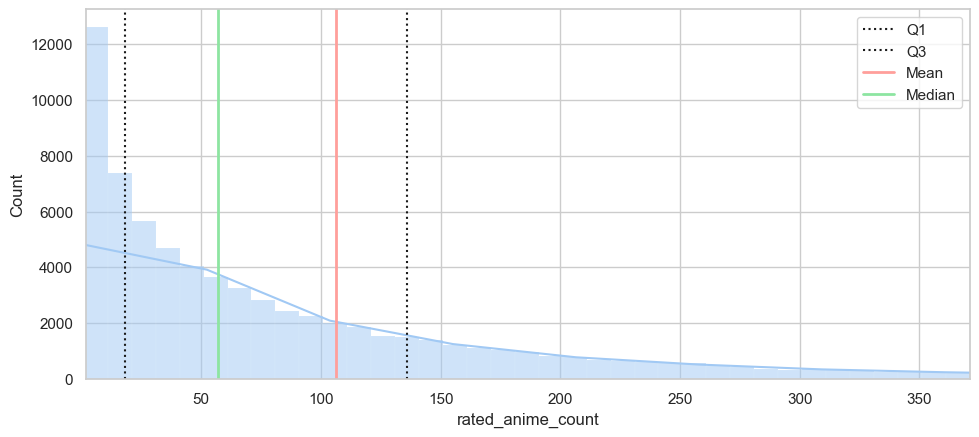

In [12]:
count_rated_by_user_df = rating_merged_df.groupby(['user_id'])[['anime_id']].count().sort_values(by='anime_id').rename(columns={'anime_id': 'rated_anime_count'}).reset_index()

fig, axs = plt.subplots(ncols=1, figsize=CONFIG.PLT_FIG_SIZE)

sns.histplot(count_rated_by_user_df, x='rated_anime_count', binwidth=10,  kde=True, ax=axs)
axs.set(xlim=(count_rated_by_user_df['rated_anime_count'].quantile(0.05), count_rated_by_user_df['rated_anime_count'].quantile(0.95)))
axs.axvline(count_rated_by_user_df['rated_anime_count'].quantile(0.25), color='k', linestyle='dotted', linewidth=1.5, label='Q1')
axs.axvline(count_rated_by_user_df['rated_anime_count'].quantile(0.75), color='k', linestyle='dotted', linewidth=1.5, label='Q3')
axs.axvline(count_rated_by_user_df['rated_anime_count'].mean(), color='r', linestyle='-', linewidth=2, label='Mean')
axs.axvline(count_rated_by_user_df['rated_anime_count'].median(), color='g', linestyle='-', linewidth=2, label='Median')
axs.legend()

print(f"quatile 12.5: {count_rated_by_user_df['rated_anime_count'].quantile(0.125)}")
print(f"quatile 87.5: {count_rated_by_user_df['rated_anime_count'].quantile(0.875)}")
print(f"quatile 50.0: {count_rated_by_user_df['rated_anime_count'].quantile(0.5)}")
print(f"quatile 60.0: {count_rated_by_user_df['rated_anime_count'].quantile(0.6)}")
print(f"quatile 70.0: {count_rated_by_user_df['rated_anime_count'].quantile(0.7)}")
print(f"quatile 75.0: {count_rated_by_user_df['rated_anime_count'].quantile(0.7)}")
print(f"quatile 80.0: {count_rated_by_user_df['rated_anime_count'].quantile(0.8)}")

count_rated_by_user_df.describe().apply(lambda s: s.apply('{0:.1f}'.format))

## **Data Cleansing (1)**

In Anime DataFrame, drop all anime types except `TV`, `Movie`, `OVA`, `Special`, `ONA`, `Music`

In [13]:
type_except_list = ["TV", 'Movie', "OVA", "Special", "ONA", "Music"] # FIXME : TUNING ME!!!

print(f"{PRINT_COLOR_CODE.FAIL}drop all anime types except {PRINT_COLOR_CODE.GREEN}{type_except_list}{PRINT_COLOR_CODE.ENDC}")

new_anime_df = anime_df[anime_df['type'].isin(type_except_list)]

drop_count = len(anime_df)-len(new_anime_df)
drop_percentage = (drop_count/len(anime_df))*100

print(f"{PRINT_COLOR_CODE.FAIL}drop {PRINT_COLOR_CODE.WARNING}{drop_count}{PRINT_COLOR_CODE.ENDC} {PRINT_COLOR_CODE.FAIL}rows{PRINT_COLOR_CODE.ENDC} ({drop_percentage:.4f}%)")

anime_df = new_anime_df

anime_df.reset_index(drop=True, inplace=True)
anime_df


drop all anime types except ['TV', 'Movie', 'OVA', 'Special', 'ONA', 'Music']
drop 25 rows (0.2034%)


,anime_id,name,genre,type,episodes,average_rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12264,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12265,5543,Under World,Hentai,OVA,1,4.28,183
12266,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12267,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In Anime DataFrame, drop less than `{{min_n_members_threshold}}` members anime

In [14]:
min_n_members_threshold = 225  # FIXME : TUNING ME!!!

print(f"{PRINT_COLOR_CODE.FAIL}drop less than {PRINT_COLOR_CODE.WARNING}{min_n_members_threshold}{PRINT_COLOR_CODE.ENDC} {PRINT_COLOR_CODE.FAIL}members anime{PRINT_COLOR_CODE.ENDC}")

new_anime_df = anime_df[anime_df['members'] >= min_n_members_threshold]

drop_count = len(anime_df)-len(new_anime_df)
drop_percentage = (drop_count/len(anime_df))*100

print(f"{PRINT_COLOR_CODE.FAIL}drop {PRINT_COLOR_CODE.WARNING}{drop_count}{PRINT_COLOR_CODE.ENDC} {PRINT_COLOR_CODE.FAIL}rows{PRINT_COLOR_CODE.ENDC} ({drop_percentage:.4f}%)")

anime_df = new_anime_df

anime_df.reset_index(drop=True, inplace=True)
anime_df


drop less than 225 members anime
drop 3068 rows (25.0061%)


,anime_id,name,genre,type,episodes,average_rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
9196,7914,Kyuukyoku no Chef wa Oishinbo Papa,Hentai,OVA,1,5.43,262
9197,5559,Nijuusou: Wana ni Ochita Onna-tachi,Hentai,OVA,1,5.20,240
9198,34492,Nuki Doki! Tenshi to Akuma no Sakusei Battle -...,Hentai,OVA,Unknown,NaN,392
9199,34312,Saimin Class,Hentai,OVA,Unknown,NaN,240


join (inner) Rating Dataframe with Anime Dataframe `again`

In [15]:
rating_merged_df = rating_df.merge(anime_df, on='anime_id', how='inner')

rating_merged_df

,user_id,anime_id,user_rating,name,genre,type,episodes,average_rating,members
0,1,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
1,3,20,8,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
2,5,20,6,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
3,6,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
4,10,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
...,...,...,...,...,...,...,...,...,...
7809105,53492,32251,5,Mirai e no Kakehashi: Bridge for Future,Slice of Life,ONA,6,5.18,282
7809106,59537,33454,7,Kochira Katsushikaku Kameari Kouenmae Hashutsu...,"Comedy, Police, Shounen, Slice of Life",Special,1,7.77,268
7809107,63076,26123,7,Seitokai Yakuindomo* OVA,"Comedy, School, Shounen, Slice of Life",OVA,6,8.05,26361
7809108,65682,30450,8,Dr. Slump: Hoyoyo! Arale no Himitsu Dai Koukai...,"Comedy, Sci-Fi, Shounen",Special,1,6.17,248


## **Data Exploration (2)**

### 1. **Rating Merged Dataframe** Basic Info.

In [16]:
print(f'\n{PRINT_COLOR_CODE.FAIL}List of columns that contain NaN values : {PRINT_COLOR_CODE.WARNING}{get_cols_contained_na(rating_merged_df)}{PRINT_COLOR_CODE.ENDC}')

rating_merged_df


List of columns that contain NaN values : ['genre', 'average_rating']


,user_id,anime_id,user_rating,name,genre,type,episodes,average_rating,members
0,1,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
1,3,20,8,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
2,5,20,6,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
3,6,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
4,10,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
...,...,...,...,...,...,...,...,...,...
7809105,53492,32251,5,Mirai e no Kakehashi: Bridge for Future,Slice of Life,ONA,6,5.18,282
7809106,59537,33454,7,Kochira Katsushikaku Kameari Kouenmae Hashutsu...,"Comedy, Police, Shounen, Slice of Life",Special,1,7.77,268
7809107,63076,26123,7,Seitokai Yakuindomo* OVA,"Comedy, School, Shounen, Slice of Life",OVA,6,8.05,26361
7809108,65682,30450,8,Dr. Slump: Hoyoyo! Arale no Himitsu Dai Koukai...,"Comedy, Sci-Fi, Shounen",Special,1,6.17,248


,user_id,anime_id,user_rating,average_rating,members
count,7809110.0,7809110.0,7809110.0,7809108.0,7809110.0
mean,36726.5,8902.9,6.1,7.7,178726.3
std,20999.5,8880.3,3.7,0.7,188182.0
min,1.0,1.0,-1.0,2.0,225.0
25%,18974.0,1240.0,6.0,7.3,44108.0
50%,36774.0,6213.0,7.0,7.7,110748.0
75%,54763.0,14075.0,9.0,8.1,244268.0
max,73516.0,34475.0,10.0,9.4,1013917.0


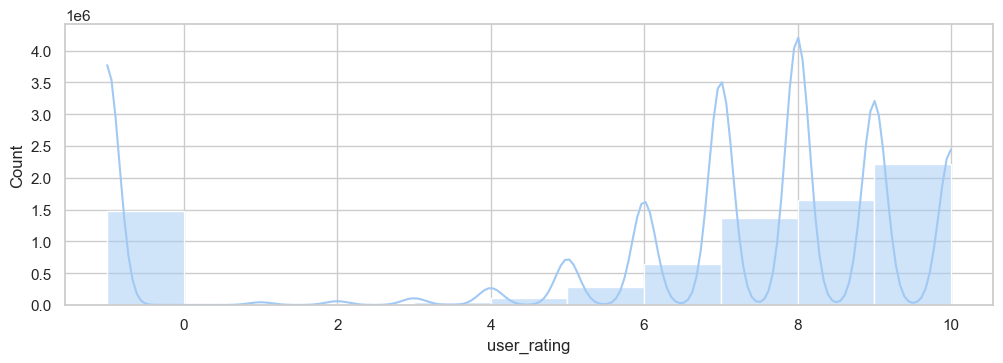

In [17]:
fig, axs = plt.subplots(ncols=1, figsize=CONFIG.PLT_FIG_SIZE)
fig.tight_layout(pad=5.0)

sns.histplot(rating_merged_df, x='user_rating', kde=True, binwidth=1, binrange=[-1, 10], ax=axs)

rating_merged_df.describe().apply(lambda s: s.apply('{0:.1f}'.format))


### 2. Compare **Anime Dataframe** vs **Rating Merged Dataframe**

In [18]:
rating_merged_droped_unrated_user_df = rating_merged_df.drop(rating_merged_df[rating_merged_df['user_rating'] < 0].index)

compare_anime_vs_rating_merged_df = rating_merged_droped_unrated_user_df.groupby(['anime_id']).agg({
    'members': 'mean',
    'user_id': 'count',
    'average_rating': 'mean',
    'user_rating': 'mean',
})
compare_anime_vs_rating_merged_df.rename(
    columns={
        'user_id': 'rating_merged: members (cal)',
        'user_rating': 'rating_merged: average_rating (cal)',
        'members': 'anime: members',
        'average_rating': 'anime: average_rating'
    },
    inplace=True)

print(f'{PRINT_COLOR_CODE.WARNING}Anime Dataframe vs Rating Merged Dataframe (droped users who have not rated anime){PRINT_COLOR_CODE.ENDC}\n')
print(f'{PRINT_COLOR_CODE.CYAN}Anime Dataframe{PRINT_COLOR_CODE.ENDC} contains {PRINT_COLOR_CODE.GREEN}{anime_df.shape[0]}{PRINT_COLOR_CODE.ENDC} unique animes')
print(f'{PRINT_COLOR_CODE.CYAN}Rating Merged Dataframe (droped users who have not rated anime){PRINT_COLOR_CODE.ENDC} contains {PRINT_COLOR_CODE.GREEN}{compare_anime_vs_rating_merged_df.shape[0]}{PRINT_COLOR_CODE.ENDC} unique animes')

compare_anime_vs_rating_merged_df


Anime Dataframe vs Rating Merged Dataframe (droped users who have not rated anime)

Anime Dataframe contains 9201 unique animes
Rating Merged Dataframe (droped users who have not rated anime) contains 8724 unique animes


,anime: members,rating_merged: members (cal),anime: average_rating,rating_merged: average_rating (cal)
anime_id,,,,
1,486824.0,13449,8.82,8.869433
5,137636.0,5790,8.40,8.439724
6,283069.0,9385,8.32,8.419393
7,64905.0,2169,7.36,7.533426
8,9848.0,308,7.06,7.198052
...,...,...,...,...
34324,817.0,11,5.40,5.909091
34325,1454.0,15,7.05,7.333333
34349,1885.0,3,7.25,7.000000


## **Data Cleansing (2)**

In Rating Merged DataFrame, replace all instances of `user_rating` with `average_rating` for rows where user_rating == -1 (unrated anime).

In [19]:
rating_merged_df['user_rating'] = rating_merged_df.apply(lambda x: x['user_rating'] if x['user_rating'] > -1 else x['average_rating'], axis=1)

rating_merged_df.reset_index(drop=True, inplace=True)
rating_merged_df


,user_id,anime_id,user_rating,name,genre,type,episodes,average_rating,members
0,1,20,7.81,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
1,3,20,8.00,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
2,5,20,6.00,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
3,6,20,7.81,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
4,10,20,7.81,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
...,...,...,...,...,...,...,...,...,...
7809105,53492,32251,5.00,Mirai e no Kakehashi: Bridge for Future,Slice of Life,ONA,6,5.18,282
7809106,59537,33454,7.00,Kochira Katsushikaku Kameari Kouenmae Hashutsu...,"Comedy, Police, Shounen, Slice of Life",Special,1,7.77,268
7809107,63076,26123,7.00,Seitokai Yakuindomo* OVA,"Comedy, School, Shounen, Slice of Life",OVA,6,8.05,26361
7809108,65682,30450,8.00,Dr. Slump: Hoyoyo! Arale no Himitsu Dai Koukai...,"Comedy, Sci-Fi, Shounen",Special,1,6.17,248


## **Data Exploration (3)**

### 1. Compare **Anime Dataframe** vs **Rating Merged Dataframe**

In [20]:
# NOTE : SAME AS ABOVE, IF NO CLEANSING (2)
rating_merged_replaced_unrated_user_df = rating_merged_df.drop(rating_merged_df[rating_merged_df['user_rating'] < 0].index)

compare_anime_vs_rating_merged_df = rating_merged_replaced_unrated_user_df.groupby(['anime_id']).agg({
    'members': 'mean',
    'user_id': 'count',
    'average_rating': 'mean',
    'user_rating': 'mean',
})
compare_anime_vs_rating_merged_df.rename(
    columns={
        'user_id': 'rating_merged: members (cal)',
        'user_rating': 'rating_merged: average_rating (cal)',
        'members': 'anime: members',
        'average_rating': 'anime: average_rating'
    },
    inplace=True)

print(f'{PRINT_COLOR_CODE.WARNING}Anime Dataframe vs Rating Merged Dataframe (after assigning average rating intead of user rating for users who have not rated anime){PRINT_COLOR_CODE.ENDC}\n')
print(f'{PRINT_COLOR_CODE.CYAN}Anime Dataframe{PRINT_COLOR_CODE.ENDC} contains {PRINT_COLOR_CODE.GREEN}{anime_df.shape[0]}{PRINT_COLOR_CODE.ENDC} unique animes')
print(f'{PRINT_COLOR_CODE.CYAN}Rating Merged Dataframe (after assigning average rating intead of user rating for users who have not rated anime){PRINT_COLOR_CODE.ENDC} contains {PRINT_COLOR_CODE.GREEN}{compare_anime_vs_rating_merged_df.shape[0]}{PRINT_COLOR_CODE.ENDC} unique animes')

compare_anime_vs_rating_merged_df


Anime Dataframe vs Rating Merged Dataframe (after assigning average rating intead of user rating for users who have not rated anime)

Anime Dataframe contains 9201 unique animes
Rating Merged Dataframe (after assigning average rating intead of user rating for users who have not rated anime) contains 8818 unique animes


,anime: members,rating_merged: members (cal),anime: average_rating,rating_merged: average_rating (cal)
anime_id,,,,
1,486824.0,15509,8.82,8.862867
5,137636.0,6927,8.40,8.433203
6,283069.0,11077,8.32,8.404211
7,64905.0,2629,7.36,7.503081
8,9848.0,413,7.06,7.162954
...,...,...,...,...
34325,1454.0,20,7.05,7.262500
34349,1885.0,7,7.25,7.142857
34367,582.0,5,5.97,5.394000


### 2. **Anime Dataframe** Top 10 Members and Top 10 Average Rating

[Text(0, 0, 'Kimi no Na wa.'),
 Text(1, 0, 'Fullmetal Alchemist: Brotherhood'),
 Text(2, 0, 'Gintama°'),
 Text(3, 0, 'Steins;Gate'),
 Text(4, 0, 'Gintama&#039;'),
 Text(5, 0, 'Haikyuu!!: Karasuno Koukou VS Shiratorizawa Gakuen Koukou'),
 Text(6, 0, 'Hunter x Hunter (2011)'),
 Text(7, 0, 'Ginga Eiyuu Densetsu'),
 Text(8, 0, 'Gintama&#039;: Enchousen'),
 Text(9, 0, 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare')]

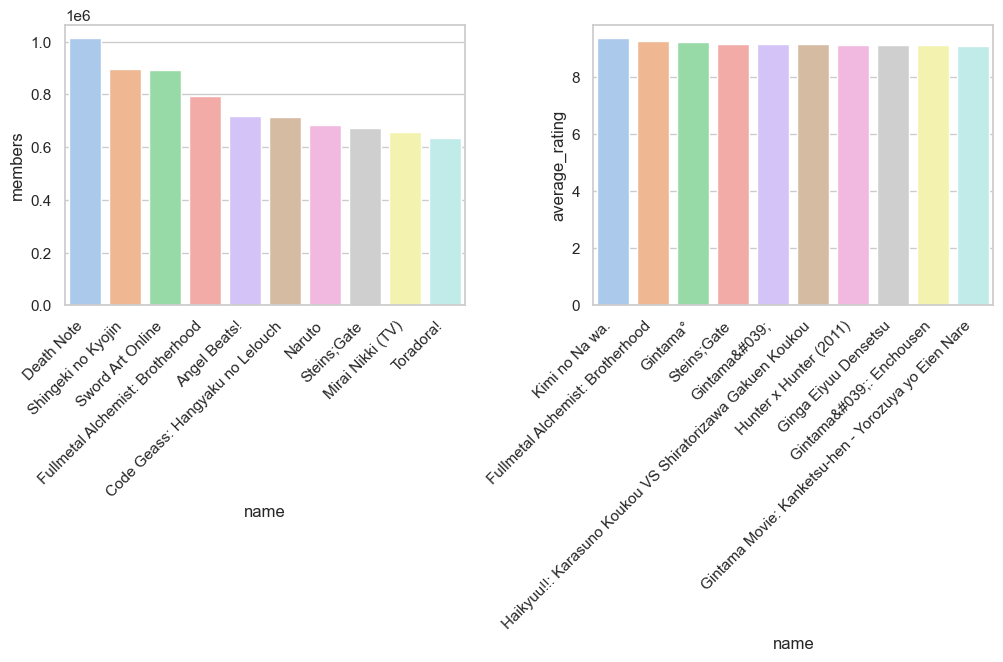

In [21]:
anime_top_10_members_df = anime_df.sort_values(by='members', ascending=False).head(10)
anime_top_10_rating_df = anime_df.sort_values(by='average_rating', ascending=False).head(10)

fig, axs = plt.subplots(ncols=2, figsize=CONFIG.PLT_FIG_SIZE)
fig.tight_layout(pad=5.0)

plt_0 = sns.barplot(data=anime_top_10_members_df, x='name', y='members', ax=axs[0])
plt_0.set_xticklabels(plt_0.get_xticklabels(),rotation=45, horizontalalignment='right')

plt_1 = sns.barplot(data=anime_top_10_rating_df, x='name',y='average_rating',  ax=axs[1])
plt_1.set_xticklabels(plt_1.get_xticklabels(),rotation=45, horizontalalignment='right')


## **Recommended System (Content-based filtering)**

### 1. **Import Libraries**

In [22]:
import nltk


### 2. **Config**

In [23]:
stopwords = nltk.corpus.stopwords.words("english")
nltk.download("stopwords")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### 3. **Define Util Functions**

In [91]:
# function to return list of keywords from the input text
def get_keywords(input_text, split_method=False):
    if input_text is np.NaN:
        return []

    if split_method:
        return input_text.replace(' ', '').split(',')
    else:
        input_text = input_text.lower()

        input_text = ''.join(
            [char for char in input_text if char.isalpha() or char.isspace()])

        return [ele for ele in input_text.split() if ele not in stopwords]


# funtions to return the jaccard similarity between two lists
def jaccard_similarity(x, y):
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))

    if (union_cardinality == 0):
        print(union_cardinality, x, y)

    print("JACCARD RESULT: ",intersection_cardinality/float(union_cardinality))

    return intersection_cardinality/float(union_cardinality)


### 4. **Implmenting Core**

In [25]:
class ContentBasedFiltering:
    # FIXME : TUNING ME!!!
    WEIGHT_AVG_RATING = 0.75
    WEIGHT_GENRE = 0.25

    def __init__(self, ctb_anime_df):
        self.anime_df = ctb_anime_df.copy()

    def suggest(self, n, picked_anime_id, debug=False):
        if self.anime_df[self.anime_df['anime_id'] == picked_anime_id].empty:
            raise ValueError('Not found picked anime id ({picked_anime_id}) in self.anime_df')
        
        picked_anime_name = self.anime_df[self.anime_df['anime_id']==picked_anime_id]['name'].tolist()[0]
        picked_anime_keywords = {
            'genre': get_keywords(self.anime_df[self.anime_df['anime_id'] == picked_anime_id]['genre'].tolist()[0], split_method=True),
        }
 
        if debug:
            print(f"Picked Anime Name : {PRINT_COLOR_CODE.GREEN}{picked_anime_name}{PRINT_COLOR_CODE.ENDC}\n")
            print(f'(Weight Genre : {ContentBasedFiltering.WEIGHT_GENRE}) Selected Anime Keywords (genre) : {PRINT_COLOR_CODE.WARNING}{picked_anime_keywords["genre"]}{PRINT_COLOR_CODE.ENDC}\n')
            

        self.anime_df['keywords_genre'] = self.anime_df.apply(lambda x: get_keywords(x['genre'], split_method=True), axis=1)

        self.anime_df['ranking_score'] = self.anime_df.apply(
            lambda x: (ContentBasedFiltering.WEIGHT_AVG_RATING) * x['average_rating']/float(10) 
            + (ContentBasedFiltering.WEIGHT_GENRE) * jaccard_similarity(picked_anime_keywords['genre'], x['keywords_genre'])
        , axis=1)

        return self.anime_df[self.anime_df['anime_id'] != picked_anime_id].sort_values(by='ranking_score', ascending=False).head(n)


### 5. **Evaluation**

In [26]:
anime_suggestion_size = 10


In [28]:
min_n_animes_threshold = 57
max_n_animes_threshold = 136

user_selection_size = 1857 # 10% of 18570 users

count_rated_by_user_df = rating_merged_df.groupby(['user_id'])[['anime_id']].count().sort_values(by='anime_id').rename(columns={'anime_id': 'rated_anime_count'}).reset_index()
count_rated_by_user_trimed_df = count_rated_by_user_df[(min_n_animes_threshold <= count_rated_by_user_df['rated_anime_count']) & (count_rated_by_user_df['rated_anime_count'] <= max_n_animes_threshold)]

print(f'select {PRINT_COLOR_CODE.GREEN}{user_selection_size}{PRINT_COLOR_CODE.ENDC} users from {len(count_rated_by_user_trimed_df)} users who have seen {min_n_animes_threshold} - {max_n_animes_threshold} animes')

# Calculate weights for each element based on its position in the data
weights = np.arange(len(count_rated_by_user_trimed_df)) + 1
weights = weights / np.sum(weights)
weights = np.flip(weights)

user_selection_size = min(len(count_rated_by_user_trimed_df), user_selection_size)

selected_user_ids = np.random.choice(count_rated_by_user_trimed_df['user_id'], size=user_selection_size, p=weights, replace=False )

print(f'select {PRINT_COLOR_CODE.GREEN}{user_selection_size}{PRINT_COLOR_CODE.ENDC} users from {len(count_rated_by_user_trimed_df)} users who have seen {min_n_animes_threshold} - {max_n_animes_threshold} animes (actual)')

print(f'{PRINT_COLOR_CODE.WARNING}selected user ids (for evaluation) : \n{PRINT_COLOR_CODE.CYAN}{selected_user_ids}{PRINT_COLOR_CODE.ENDC}')


select 1857 users from 18570 users who have seen 57 - 136 animes
select 1857 users from 18570 users who have seen 57 - 136 animes (actual)
selected user ids (for evaluation) : 
[62083 61629  3889 ... 16108  1045 25129]


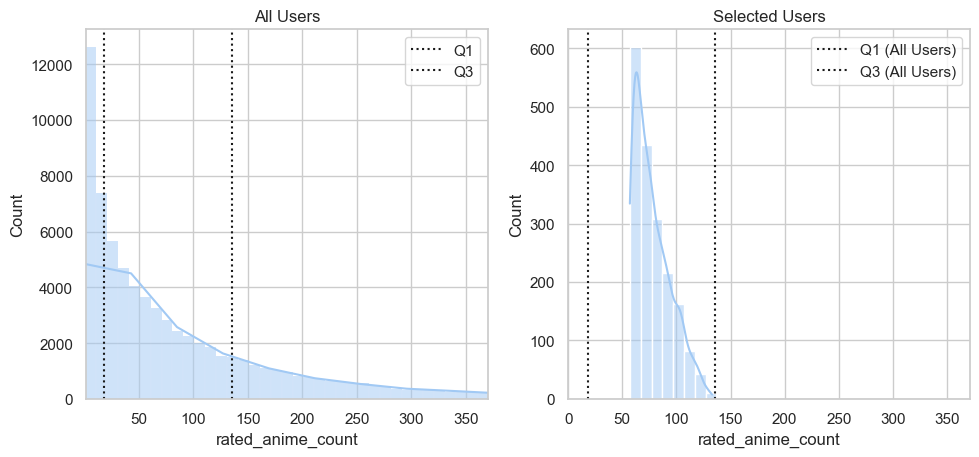

In [32]:
count_rated_by_selected_user_df = count_rated_by_user_df[count_rated_by_user_df['user_id'].isin(selected_user_ids)]

fig, axs = plt.subplots(ncols=2, figsize=CONFIG.PLT_FIG_SIZE)

sns.histplot(count_rated_by_user_df, x='rated_anime_count', binwidth=10,  kde=True, ax=axs[0])
axs[0].set(xlim=(count_rated_by_user_df['rated_anime_count'].quantile(0.05), count_rated_by_user_df['rated_anime_count'].quantile(0.95)))
axs[0].axvline(count_rated_by_user_df['rated_anime_count'].quantile(0.25), color='k', linestyle='dotted', linewidth=1.5, label='Q1')
axs[0].axvline(count_rated_by_user_df['rated_anime_count'].quantile(0.75), color='k', linestyle='dotted', linewidth=1.5, label='Q3')
axs[0].set_title("All Users")
axs[0].legend(loc="upper right")

sns.histplot(count_rated_by_selected_user_df, x='rated_anime_count', binwidth=10,  kde=True, ax=axs[1])
axs[1].axvline(count_rated_by_user_df['rated_anime_count'].quantile(0.25), color='k', linestyle='dotted', linewidth=1.5, label='Q1 (All Users)')
axs[1].axvline(count_rated_by_user_df['rated_anime_count'].quantile(0.75), color='k', linestyle='dotted', linewidth=1.5, label='Q3 (All Users)')
# axs[1].axvline(count_rated_by_selected_user_df['rated_anime_count'].quantile(0), color='k', linestyle='dotted', linewidth=1.5, label='Q1 (All Users)')
# axs[1].axvline(count_rated_by_selected_user_df['rated_anime_count'].quantile(1), color='k', linestyle='dotted', linewidth=1.5, label='Q3 (All Users)')
axs[1].set(xlim=(0,371))
axs[1].set_title("Selected Users")
axs[1].legend(loc="upper right")

#### 5.1. **Evaluation** using **Top-K Precision**

In [33]:
k = 5

print(f'Evaluation using {PRINT_COLOR_CODE.BOLD}{PRINT_COLOR_CODE.GREEN}Top-{k} Precision{PRINT_COLOR_CODE.ENDC}')


Evaluation using Top-5 Precision


In [34]:
avg_top_k_score_by_time_list = []
sum_top_k_score = 0
for selected_user_id in selected_user_ids:
    selected_user_rating_merged_df = rating_merged_df[rating_merged_df['user_id'] == selected_user_id]
    selected_user_rating_merged_df.reset_index(drop=True, inplace=True)
   
    selected_anime_id = np.random.choice(selected_user_rating_merged_df['anime_id'].unique(), size=1)[0]

    # print(
    #     f'\nTest by having user_id:{selected_user_id} pick anime_id:{selected_anime_id}'
    # )

    core = ContentBasedFiltering(anime_df)
    ctb_suggestion_df = core.suggest(n=anime_suggestion_size, picked_anime_id=selected_anime_id)

    top_k_score = len(set.intersection(*[set(ctb_suggestion_df['anime_id'].head(k)), set(selected_user_rating_merged_df['anime_id'])]))/float(k)

    # print(
    #     f'top_k_score : {top_k_score:.4f} (k = {k}, Suggest {len(ctb_suggestion_df)} animes, Answer {len(selected_user_rating_merged_df)-1} animes)'
    # )

    sum_top_k_score += top_k_score
    avg_top_k_score_by_time_list.append(sum_top_k_score/float(len(avg_top_k_score_by_time_list)+1))

print(f'\n{PRINT_COLOR_CODE.WARNING}avg_top_k_score : {PRINT_COLOR_CODE.GREEN}{avg_top_k_score_by_time_list[-1]}{PRINT_COLOR_CODE.ENDC}')



avg_top_k_score : 0.1795368874528785


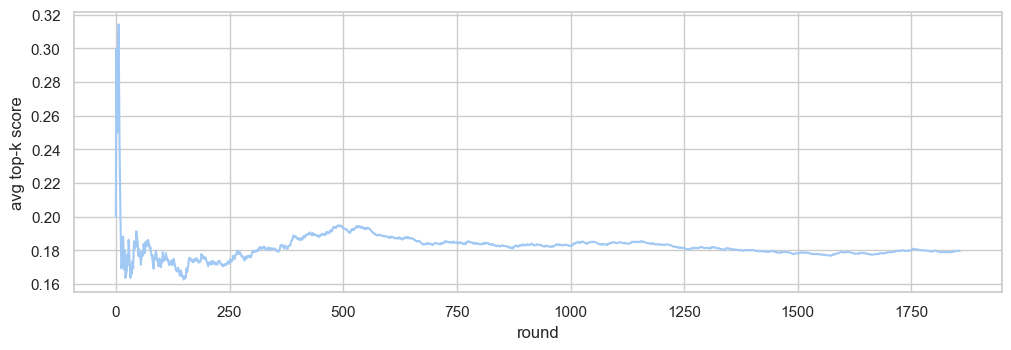

In [35]:
fig, axs = plt.subplots(ncols=1, figsize=CONFIG.PLT_FIG_SIZE)
fig.tight_layout(pad=5.0)

plt_0 = sns.lineplot(avg_top_k_score_by_time_list, ax=axs).set(xlabel='round', ylabel='avg top-k score')


#### 5.2. **Evaluation** using **AUC**

In [36]:
avg_auc_score_by_time_list = []
sum_auc_score = 0

for selected_user_id in selected_user_ids:
    selected_user_rating_merged_df = rating_merged_df[rating_merged_df['user_id'] == selected_user_id]
    selected_user_rating_merged_df.reset_index(drop=True, inplace=True)

    selected_anime_id = np.random.choice(selected_user_rating_merged_df['anime_id'].unique(), size=1)[0]

    # print(
    #     f'\nTest by having user_id:{selected_user_id} pick anime_id:{selected_anime_id}'
    # )

    core = ContentBasedFiltering(anime_df)
    core.suggest(n=anime_suggestion_size, picked_anime_id=selected_anime_id)

    ctb_anime_actual_interect_df = core.anime_df[core.anime_df['anime_id'].isin(selected_user_rating_merged_df['anime_id'])].copy()
    ctb_anime_not_interect_df = core.anime_df[~core.anime_df['anime_id'].isin(selected_user_rating_merged_df['anime_id'])].copy()

    auc_score = 0

    n = len(ctb_anime_actual_interect_df) * len(ctb_anime_not_interect_df)

    ctb_anime_actual_interect_df['n_prime'] = ctb_anime_actual_interect_df.apply(lambda x: len(ctb_anime_not_interect_df[x['ranking_score'] > ctb_anime_not_interect_df['ranking_score']]), axis=1)
    ctb_anime_actual_interect_df['n_prime_2'] = ctb_anime_actual_interect_df.apply(lambda x: len(ctb_anime_not_interect_df[x['ranking_score'] == ctb_anime_not_interect_df['ranking_score']]), axis=1)

    n_prime = ctb_anime_actual_interect_df['n_prime'].sum()
    n_prime_2 = ctb_anime_actual_interect_df['n_prime_2'].sum()

    auc_score = (n_prime + (0.5 * n_prime_2)) / n

    # print(
    #     f'auc_score : {auc_score:.4f} (n = {n}, n\' = {n_prime} , n\" = {n_prime_2}) (actual_interect : {len(ctb_anime_actual_interect_df)}, not_interect : {len(ctb_anime_not_interect_df)})'
    # )

    sum_auc_score += auc_score
    avg_auc_score_by_time_list.append(sum_auc_score/float(len(avg_auc_score_by_time_list)+1))

print(f'\n{PRINT_COLOR_CODE.WARNING}avg_auc_score : {PRINT_COLOR_CODE.GREEN}{avg_auc_score_by_time_list[-1]}{PRINT_COLOR_CODE.ENDC}')


avg_auc_score : 0.8296564678952234


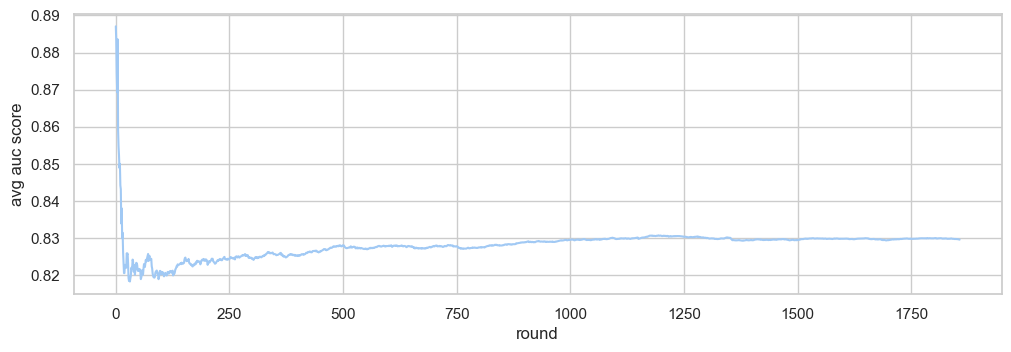

In [37]:
fig, axs = plt.subplots(ncols=1, figsize=CONFIG.PLT_FIG_SIZE)
fig.tight_layout(pad=5.0)

plt_0 = sns.lineplot(avg_auc_score_by_time_list, ax=axs).set(xlabel='round', ylabel='avg auc score')


### **6. Try Suggestion** using **Content-based filtering**

In [92]:
core = ContentBasedFiltering(anime_df)

ctb_suggestion_df = core.suggest(n=10, picked_anime_id=16498, debug=True)

ctb_suggestion_df

Picked Anime Name : Shingeki no Kyojin

(Weight Genre : 0.25) Selected Anime Keywords (genre) : ['Action', 'Drama', 'Fantasy', 'Shounen', 'SuperPower']

JACCARD RESULT:  0.125
JACCARD RESULT:  0.5
JACCARD RESULT:  0.2
JACCARD RESULT:  0.0
JACCARD RESULT:  0.2
JACCARD RESULT:  0.25
JACCARD RESULT:  0.5
JACCARD RESULT:  0.125
JACCARD RESULT:  0.2
JACCARD RESULT:  0.2
JACCARD RESULT:  0.25
JACCARD RESULT:  0.3333333333333333
JACCARD RESULT:  0.2
JACCARD RESULT:  0.375
JACCARD RESULT:  0.25
JACCARD RESULT:  0.14285714285714285
JACCARD RESULT:  0.25
JACCARD RESULT:  0.09090909090909091
JACCARD RESULT:  0.16666666666666666
JACCARD RESULT:  0.2222222222222222
JACCARD RESULT:  0.2857142857142857
JACCARD RESULT:  0.2222222222222222
JACCARD RESULT:  0.2222222222222222
JACCARD RESULT:  0.2
JACCARD RESULT:  0.3333333333333333
JACCARD RESULT:  0.0
JACCARD RESULT:  0.0
JACCARD RESULT:  0.09090909090909091
JACCARD RESULT:  0.09090909090909091
JACCARD RESULT:  0.1111111111111111
JACCARD RESULT:  0.25


,anime_id,name,genre,type,episodes,average_rating,members,keywords_genre,ranking_score
717,18397,Shingeki no Kyojin OVA,"Action, Drama, Fantasy, Shounen, Super Power",OVA,3,7.88,121063,"[Action, Drama, Fantasy, Shounen, SuperPower]",0.841000
961,23777,Shingeki no Kyojin Movie 2: Jiyuu no Tsubasa,"Action, Drama, Fantasy, Shounen, Super Power",Movie,1,7.75,26958,"[Action, Drama, Fantasy, Shounen, SuperPower]",0.831250
1069,23775,Shingeki no Kyojin Movie 1: Guren no Yumiya,"Action, Drama, Fantasy, Shounen, Super Power",Movie,1,7.70,31990,"[Action, Drama, Fantasy, Shounen, SuperPower]",0.827500
74,21,One Piece,"Action, Adventure, Comedy, Drama, Fantasy, Sho...",TV,Unknown,8.58,504862,"[Action, Adventure, Comedy, Drama, Fantasy, Sh...",0.822071
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,"[Action, Adventure, Drama, Fantasy, Magic, Mil...",0.819500
6,11061,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,148,9.13,425855,"[Action, Adventure, Shounen, SuperPower]",0.809750
231,19123,One Piece: Episode of Merry - Mou Hitori no Na...,"Action, Adventure, Comedy, Drama, Fantasy, Sho...",Special,1,8.29,17247,"[Action, Adventure, Comedy, Drama, Fantasy, Sh...",0.800321
241,15323,One Piece: Episode of Nami - Koukaishi no Nami...,"Action, Adventure, Comedy, Drama, Fantasy, Sho...",Special,1,8.27,24707,"[Action, Adventure, Comedy, Drama, Fantasy, Sh...",0.798821
821,3515,Saint Seiya: Meiou Hades Elysion-hen,"Action, Fantasy, Shounen, Super Power",OVA,6,7.82,19044,"[Action, Fantasy, Shounen, SuperPower]",0.786500
133,2685,Tsubasa: Tokyo Revelations,"Action, Adventure, Drama, Fantasy, Romance, Sh...",OVA,3,8.44,57963,"[Action, Adventure, Drama, Fantasy, Romance, S...",0.775857


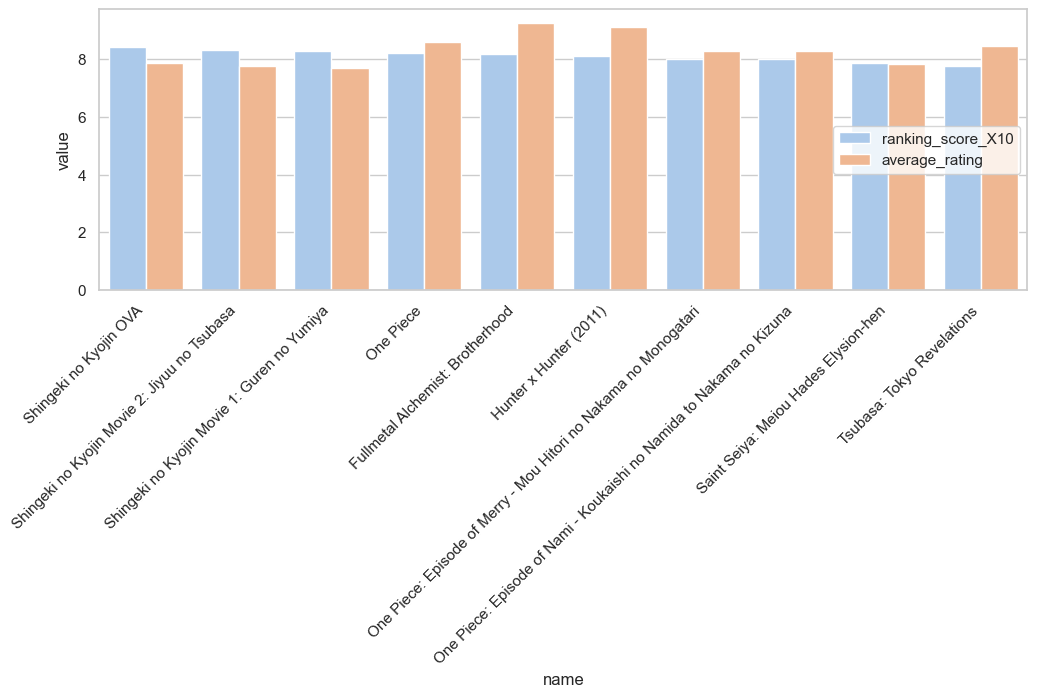

In [93]:
fig, axs = plt.subplots(ncols=1, figsize=CONFIG.PLT_FIG_SIZE)
fig.tight_layout(pad=5.0)

ctb_suggestion_df["ranking_score_X10"] = ctb_suggestion_df["ranking_score"] * 10
tidy = ctb_suggestion_df.melt(id_vars='name', value_vars=['ranking_score_X10', 'average_rating'])

plt_0 = sns.barplot(data=tidy, x='name', y='value', hue="variable", ax=axs)
plt_0.set_xticklabels(plt_0.get_xticklabels(), rotation=45, horizontalalignment='right')
plt_0.legend(loc='right')
